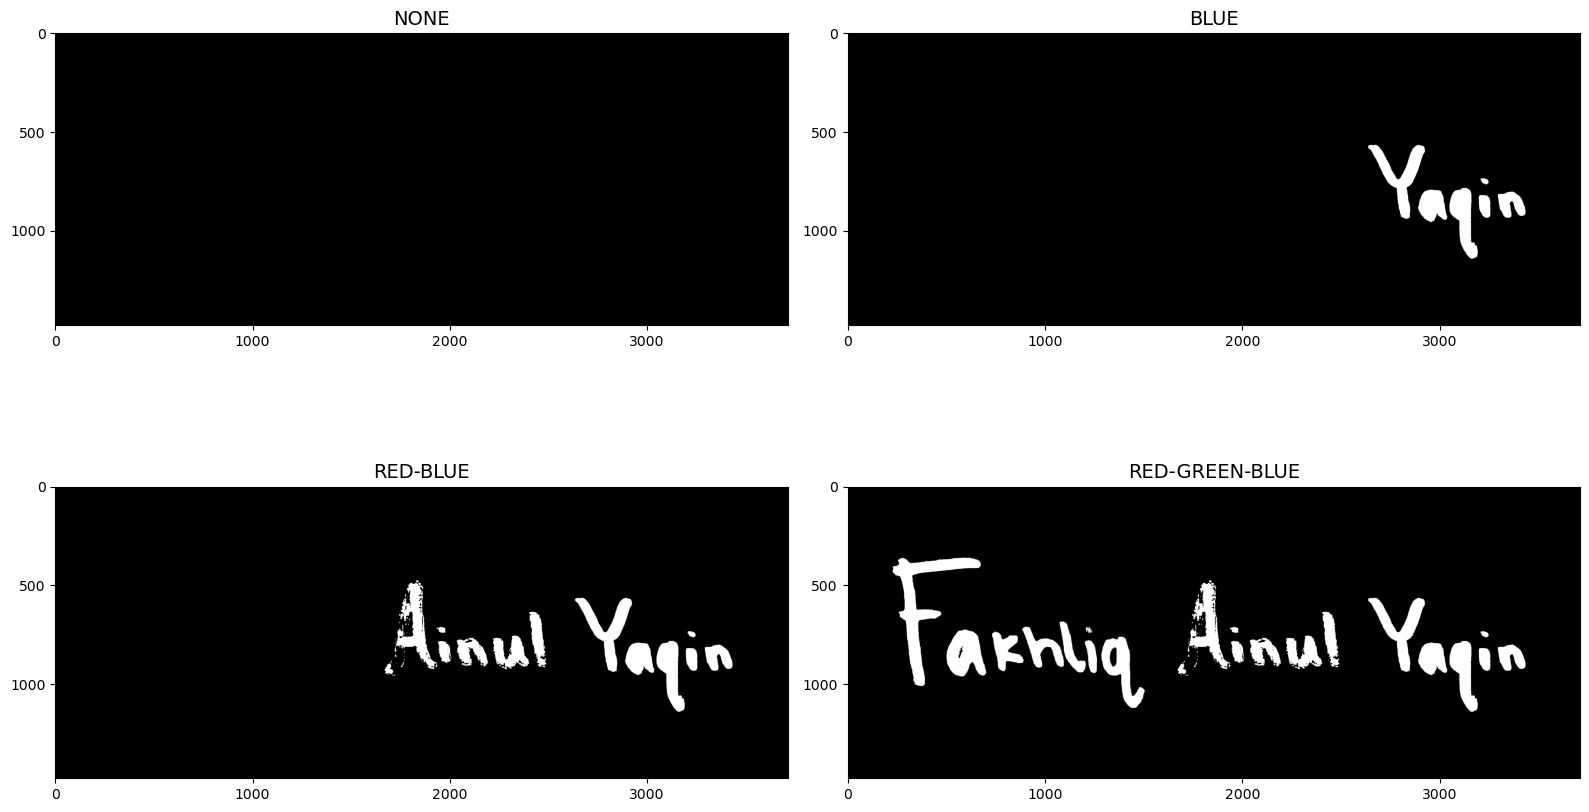

Nilai ambang batas yang digunakan:
Merah (Range 1): Lower = [ 0 60 60], Upper = [ 10 255 255]
Merah (Range 2): Lower = [160  60  60], Upper = [180 255 255]
Hijau: Lower = [40 50 50], Upper = [ 90 255 255]
Biru: Lower = [100  60  60], Upper = [130 255 255]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("nama_baru.jpg") #FAkhliq Ainul YAqin
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Fungsi untuk mendeteksi warna menggunakan rentang HSV
def detect_color_in_range(lower_bound, upper_bound, image):
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    gray_image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)
    return binary_image

# Mengubah gambar ke HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) #Fakhliq Ainul Yaqin

# Rentang HSV untuk warna tertentu
red_lower1 = np.array([0, 60, 60])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([160, 60, 60])
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([40, 50, 50])
green_upper = np.array([90, 255, 255])

blue_lower = np.array([100, 60, 60])
blue_upper = np.array([130, 255, 255])

# Membuat gambar kosong untuk "NONE"
none_image = np.zeros_like(image_rgb[:, :, 0])

# Mendeteksi warna biru
blue_detected = detect_color_in_range(blue_lower, blue_upper, image_rgb)

# Mendeteksi warna merah dengan dua rentang
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
combined_red_mask = cv2.bitwise_or(mask_red1, mask_red2)
red_image_result = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_red_mask)
red_detected = cv2.cvtColor(red_image_result, cv2.COLOR_RGB2GRAY)
_, red_detected = cv2.threshold(red_detected, 10, 255, cv2.THRESH_BINARY)

# Mendeteksi warna hijau
green_detected = detect_color_in_range(green_lower, green_upper, image_rgb)

# Menggabungkan saluran warna untuk menampilkan kombinasi
red_and_blue = cv2.bitwise_or(red_detected, blue_detected)
all_rgb_combined = cv2.bitwise_or(red_and_blue, green_detected)

# Aplikasikan morfologi untuk memperjelas teks merah
kernel = np.ones((3, 3), np.uint8)
red_detected = cv2.dilate(red_detected, kernel, iterations=1)
red_and_blue = cv2.bitwise_or(red_detected, blue_detected)
all_rgb_combined = cv2.bitwise_or(red_and_blue, green_detected)

# Daftar judul dan gambar
image_titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
image_results = [none_image, blue_detected, red_and_blue, all_rgb_combined]

# Plot gambar hasil deteksi warna
plt.figure(figsize=(16, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image_results[i], cmap='gray')
    plt.title(image_titles[i], fontsize=14)
    plt.xticks(np.arange(0, image.shape[1], 1000))
    plt.yticks(np.arange(0, image.shape[0], 500))

plt.tight_layout()
plt.show()

# Menampilkan nilai ambang batas yang digunakan
print("Nilai ambang batas yang digunakan:")
print(f"Merah (Range 1): Lower = {red_lower1}, Upper = {red_upper1}")
print(f"Merah (Range 2): Lower = {red_lower2}, Upper = {red_upper2}")
print(f"Hijau: Lower = {green_lower}, Upper = {green_upper}")
print(f"Biru: Lower = {blue_lower}, Upper = {blue_upper}")